#Intro
Jon Messier\
1/10/23
\


##Assignment 1
Your second project is going to have a lot more freedom than your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

Your task for this week is to propose two possible datasets you would like to work with for Project 2.

You will choose your first choice data set, and a backup data set in case the first proposed data set is not approved.

This data can be from any source and can be on any topic with these limitations:
- the data must be available for use (it is your responsibility to ensure that the license states that you are able to use it.)
- the data must be appropriate for a professional environment
- the data must not contain personal information
- the data must not be a dataset used for any assignment, lecture, or task from the course
- the data must not be a time series dataset. You will be able to identify these because each row will represent a moment in time. These kinds of datasets follow special rules and are not appropriate for the kind of machine learning you have learned in this stack.

Make sure you select a dataset that will be reasonable to work with in the amount of time we have left. Think about what questions you could reasonably answer with the dataset you select.

You must propose two datasets that each have a supervised learning component. You may choose a regression or classification problem for each proposed data set.

- [x] The dataset you choose must be approved by the instructor.
 - Dataset selected - Student Dropout rate

##Assignment 2
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- [ ] Deleted unnecessary columns.
- [ ] Deleted duplicate rows.
- [ ] Identified and addressed missing values.
- [ ] Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- [ ] Produced univariate visuals for the target and all features.
- [ ] Identified outliers.
- [ ] Clearly commented all of your cleaning steps and described any decisions you made.

Commit your file to your Github repository and submit the link below.

#Class Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', None)

#Custom Functions

##`df_inspect`

In [2]:
#Define an inspection function to report for duplicates, and Nan values
#remove duplicates and output list of nan counts and total
def df_inspect(df):
  print('-----'*5)
  if df.duplicated().sum() >>0:
    print(f'The total number of duplicates are : {df.duplicated().sum()}\n')
    df.drop_duplicates(inplace=True)
    print('All duplicate entries have been removed.\n')
  print(f'There are no duplicate entries.')
  print('-----'*5)
  print('\n')  
  
  #Nan values
  print('-----'*5)
  print(f'The total number of NaN-values is:{df.isna().sum().sum()}')
  if df.isna().sum().sum() >0:
   print('- - -'*5)
   print('Missing/NaN values will have to be addressed in our visual analysis and data modeling.')
   print(f'The sum of NaN-values in each column:')
   print(df.isna().sum())
  else:
   print('There are no missing values, and will not need to be adressed in our analysis.')
  print('-----'*5)
  print('\n')  
  #shape
  print('-----'*5)
  print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
  print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')
  print('-----'*5)
  print('\n')   
  #datatypes - compare to data dictionary
  print('-----'*5)
  print("Compare the following datatypes to the Data Dictionary")
  print('- - - '*5)
  print(df.dtypes)
  print('-----'*5)
  print('\n')

##`plot_charts`

In [3]:
def plot_charts(df, col, boxplot = False):
 if boxplot:
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,3), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  #Histogram axes[0]
  sns.histplot(data=df,x = col,ax = axes[0])
  #add the mean to the histogram
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
            label=f"Mean Value = ${mean_value:,.2f}",);
  #add the median to the histogram
  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
            label=f"Median Value = ${med_value:,.2f}");

  #boxplot -- axes[1]
  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'Histogram and Box plot for {col}')

# Turn off the comparitive boxplot  
 else:
   fig, axes = plt.subplots(figsize=(10,3))
   plt.xticks(rotation=45)
   sns.histplot(data=df,x=col, color='#69b3a2', alpha=0.3, ax=axes)
      
 ## Fixing any overlapping labels and showing
 plt.tight_layout()
 plt.show()

#Problem Statement
## Predict students' dropout and academic success
Overview found [HERE](https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.

- **For what purpose was the dataset created?**  The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course.

- **Who funded the creation of the dataset?**  This dataset is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal.

- **Are there recommended data splits?**  The dataset was used, in out project, with a data split of 80% for training and 20% for test.

- **Was there any data preprocessing performed?** We performed a rigorous data preprocessing to handle data from anomalies, unexplainable outliers, and missing values.

- **Has the dataset been used for any tasks already?**  The dataset was used in a pilot project to provide the tutoring team at our higher education institution with an estimate of the risk of dropout and failure. With this information, the tutoring team provides more accurate help to students.

- **Citation Requests/Acknowledgements:**  If you use this dataset in experiments for a scientific publication, please kindly cite our paper: M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

- License: This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

##Data Dictionary
- [ ] Need to fix this to wrap the text.... or something else.  Suggestions?!
- [ ] Create a python dictionary for each of the categories.  If we need to use the unencoded value in our analysis 

<table>
<thead><tr><th>Attribute Name</th><th>Role</th><th>Type</th><th>Description</th><th>Units</th><th>Missing Values</th></tr></thead> <tbody><tr><td>Marital status</td><td>Feature</td><td>Discrete</td><td>1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated</td><td>1</td><td>false</td> </tr><tr><td>Application mode</td><td>Feature</td><td>Discrete</td><td>1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)</td><td></td><td>false</td> </tr><tr><td>Application order</td><td>Feature</td><td>Discrete</td><td>Application order (between 0 - first choice; and 9 last choice)</td><td></td><td>false</td> </tr><tr><td>Course</td><td>Feature</td><td>Discrete</td><td>33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)</td><td></td><td>false</td> </tr><tr><td>Daytime/evening attendance	</td><td>Feature</td><td>Discrete</td><td>1 – daytime 0 - evening</td><td></td><td>false</td> </tr><tr><td>Previous qualification</td><td>Feature</td><td>Discrete</td><td>1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)</td><td></td><td>false</td> </tr><tr><td>Previous qualification (grade)</td><td>Feature</td><td>Continuous</td><td>Grade of previous qualification (between 0 and 200)</td><td></td><td>false</td> </tr><tr><td>Nacionality</td><td>Feature</td><td>Discrete</td><td>1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian</td><td></td><td>false</td> </tr><tr><td>Mother's qualification</td><td>Feature</td><td>Discrete</td><td>1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)</td><td></td><td>false</td> </tr><tr><td>Father's qualification</td><td>Feature</td><td>Discrete</td><td>1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)</td><td></td><td>false</td> </tr><tr><td>Mother's occupation</td><td>Feature</td><td>Discrete</td><td>0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants</td><td></td><td>false</td> </tr><tr><td>Father's occupation</td><td>Feature</td><td>Discrete</td><td>0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers</td><td></td><td>false</td> </tr><tr><td>Admission grade</td><td>Feature</td><td>Continuous</td><td>Admission grade (between 0 and 200)</td><td></td><td>false</td> </tr><tr><td>Displaced</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Educational special needs</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Debtor</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Tuition fees up to date</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Gender</td><td>Feature</td><td>Discrete</td><td>1 – male 0 – female</td><td></td><td>false</td> </tr><tr><td>Scholarship holder</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Age at enrollment</td><td>Feature</td><td>Discrete</td><td>Age of studend at enrollment</td><td></td><td>false</td> </tr><tr><td>International</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (credited)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units credited in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (enrolled)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units enrolled in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (evaluations)</td><td>Feature</td><td>Discrete</td><td>Number of evaluations to curricular units in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (approved)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units approved in the 1st semester</td><td></td><td>false</td> </tr>

<tr><td>Curricular units 1st sem (grade)</td><td>Feature</td><td>Discrete</td><td>Grade average in the 1st semester (between 0 and 20)</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (without evaluations)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units without evalutions in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (credited)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units credited in the 2nd semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (enrolled)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units enrolled in the 2nd semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (evaluations)</td><td>Feature</td><td>Discrete</td><td>Number of evaluations to curricular units in the 2nd semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (approved)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units approved in the 2nd semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (grade)</td><td>Feature</td><td>Discrete</td><td>Grade average in the 2nd semester (between 0 and 20)</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (without evaluations)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units without evalutions in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Unemployment rate</td><td>Feature</td><td>Continuous</td><td>Unemployment rate (%)</td><td></td><td>false</td> </tr><tr><td>Inflation rate</td><td>Feature</td><td>Continuous</td><td>Inflation rate (%)</td><td></td><td>false</td> </tr><tr><td>GDP</td><td>Feature</td><td>Continuous</td><td>GDP</td><td></td><td>false</td> </tr><tr><td>Target</td><td>Target</td><td>Categorical</td><td>Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course</td><td></td><td>false</td> </tr>


</tbody>

#Data Import

In [4]:
url1 = 'https://drive.google.com/uc?id=1wHxIjk49UNfwWDvzHdoZkn6Qh_yD5YoC'
df = pd.read_csv(url1, sep=';')

##Data Inspection

In [5]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df_inspect(df)

-------------------------
There are no duplicate entries.
-------------------------


-------------------------
The total number of NaN-values is:0
There are no missing values, and will not need to be adressed in our analysis.
-------------------------


-------------------------
There are 4424 rows, and 37 columns.
The rows represent 4424 observations, and the columns represent 36 features and 1 target variable.
-------------------------


-------------------------
Compare the following datatypes to the Data Dictionary
- - - - - - - - - - - - - - - 
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                          

>- Looking at the datatypes I see that most categories are dtype=int64.  This implies a nominal/ordinal variable.  No inconsistancies noticed when compared to the data dictionary.
- No ordinal categories noted in Data dictionary. This tells me no ordinal encoding needed in our data modeling. 
- [x] `Age` should be a continuous variable. Switch to a float


In [8]:
df['Age at enrollment'] = df['Age at enrollment'].astype('float')

For visual analysis I divide the categorical and numeric columns.  For the numeric columns I look for obvious outliers, like ages over 122, etc.

In [9]:
#divide columns into numeric and categorical nominal
cat_cols = df.select_dtypes(include='int64')
num_cols = df.select_dtypes(include='float')

###Numeric Data Inspection

In [10]:
df.select_dtypes(include='float').describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,10.640822,10.230206,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,4.843663,5.210808,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,11.000000,10.750000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,12.285714,12.200000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,13.400000,13.333333,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,18.875000,18.571429,16.200000,3.700000,3.510000


>Need more information:
 - [ ] Need to know the column units to understand potential outliers.  
  - GDP for instance has a range from -4 to 3.5.  
 - Do the following columns fall within the range listed inthe Data Dictionary?
  - [x] `Previous qualification (grade)` : between 0 and 200 
  - [x] `Admission grade`	: between 0 and 200
 - No `Age` outliers

###Categorical Inspection
For categorical columns we have to look for inconsistancies in entries.  Since this data has been encoded to integers, I have to:
- [x] Check that the number of unique entries matches the options in the Data Dictionary. (i.e. find the length of the dictonary for each encoder)
- [x] Need to review for omissions and typos

In [11]:
for col in cat_cols.columns:
  print(f'{col}: {df[col].nunique()}')

Marital status: 6
Application mode: 18
Application order: 8
Course: 17
Daytime/evening attendance	: 2
Previous qualification: 17
Nacionality: 21
Mother's qualification: 29
Father's qualification: 34
Mother's occupation: 32
Father's occupation: 46
Displaced: 2
Educational special needs: 2
Debtor: 2
Tuition fees up to date: 2
Gender: 2
Scholarship holder: 2
International: 2
Curricular units 1st sem (credited): 21
Curricular units 1st sem (enrolled): 23
Curricular units 1st sem (evaluations): 35
Curricular units 1st sem (approved): 23
Curricular units 1st sem (without evaluations): 11
Curricular units 2nd sem (credited): 19
Curricular units 2nd sem (enrolled): 22
Curricular units 2nd sem (evaluations): 30
Curricular units 2nd sem (approved): 20
Curricular units 2nd sem (without evaluations): 10


>Counts look good.
>Things to note:
 - There are many categories with 2 unique options.  These can be thought of a binary states.  

#Exploratory Visual Analysis

##Categorical Data Inspection
All data has been encoded to numerical. For example: `Martial status : [1,2,3,4,5,6]`.  

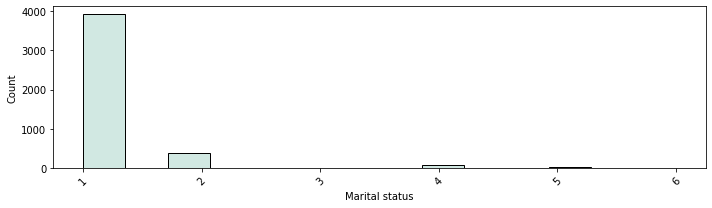

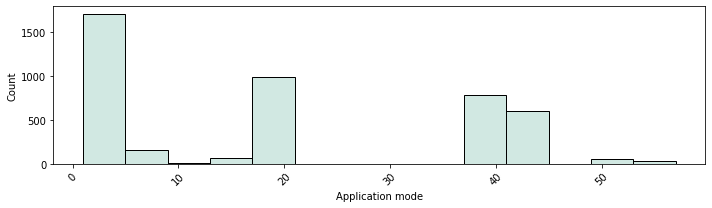

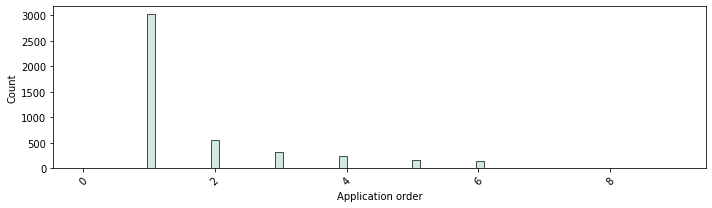

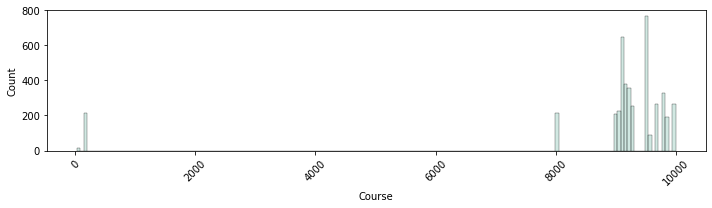

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


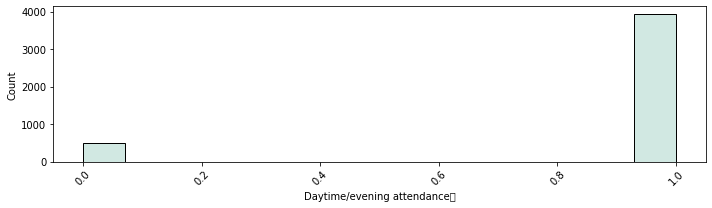

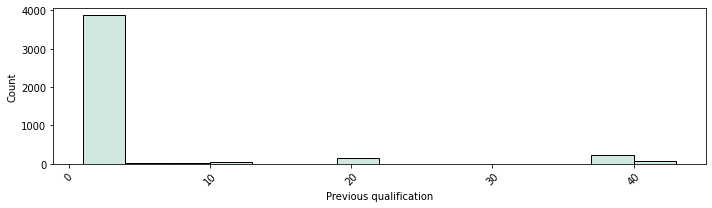

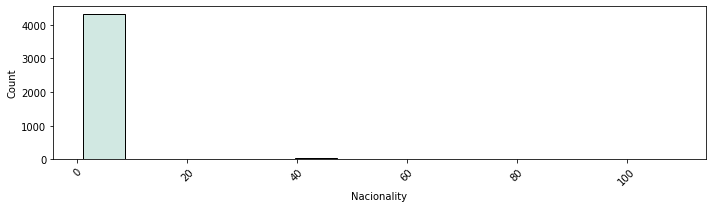

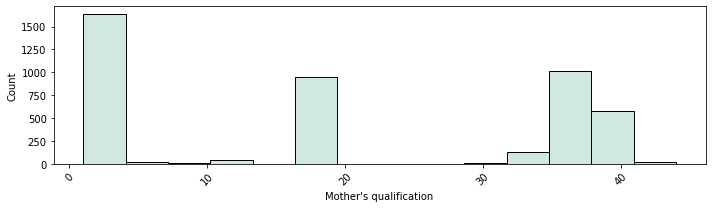

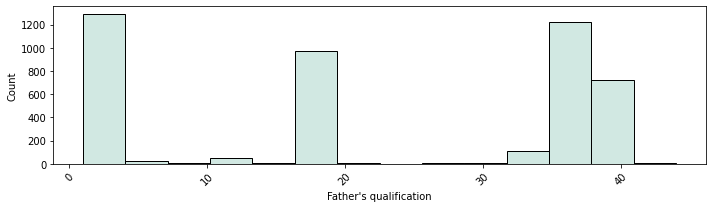

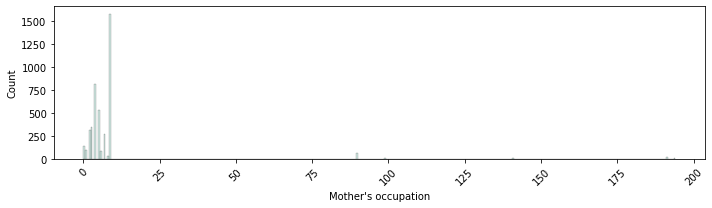

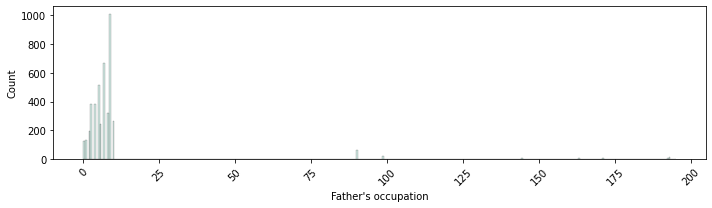

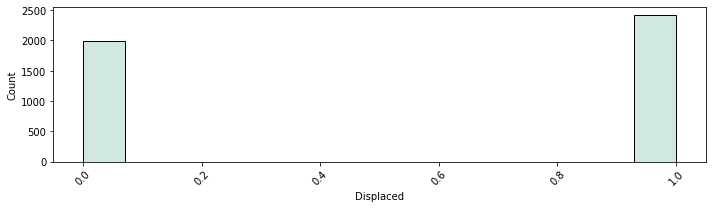

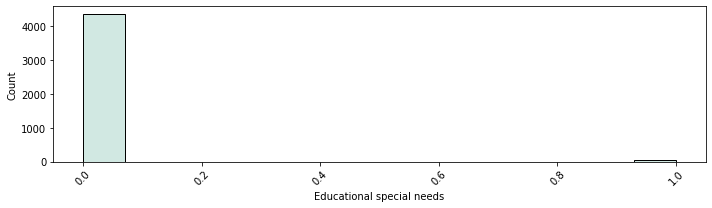

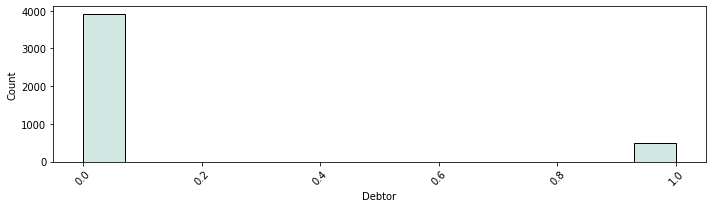

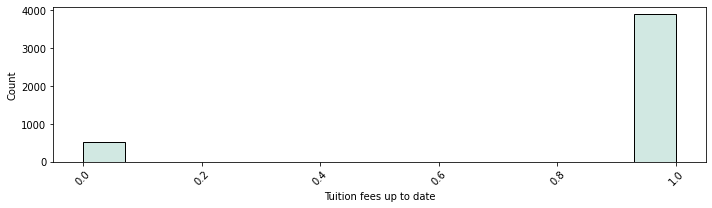

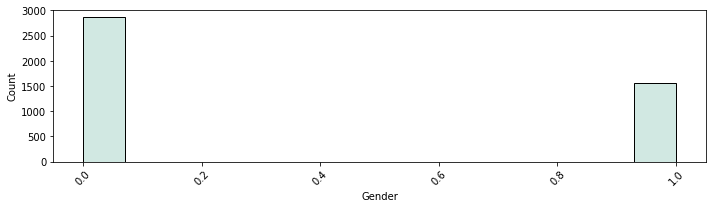

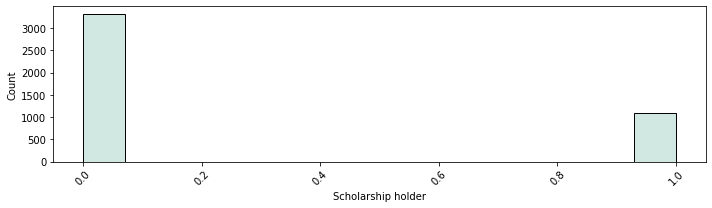

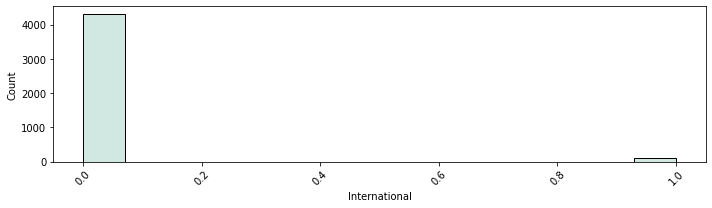

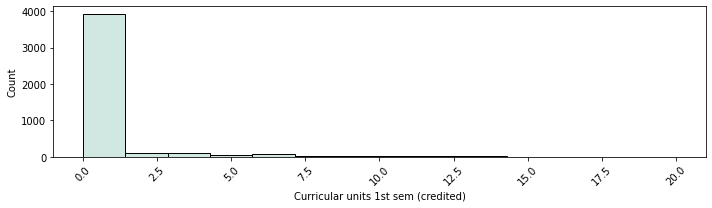

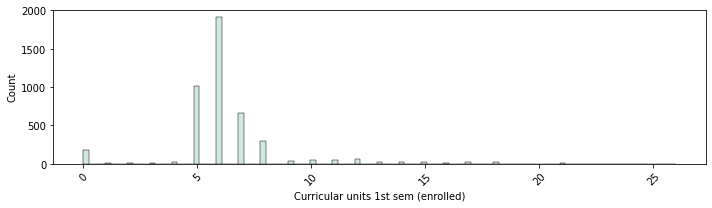

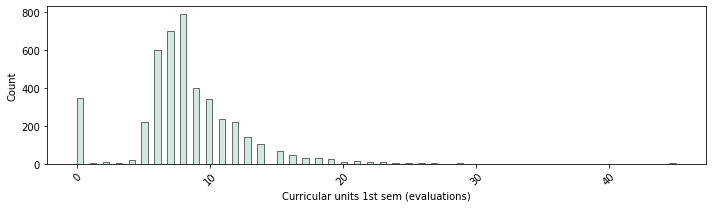

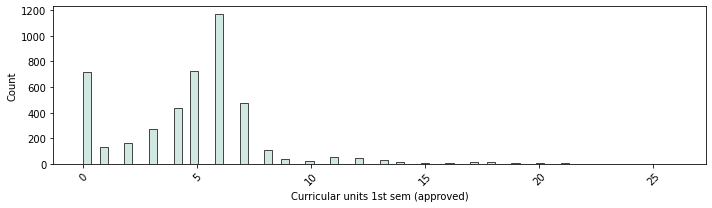

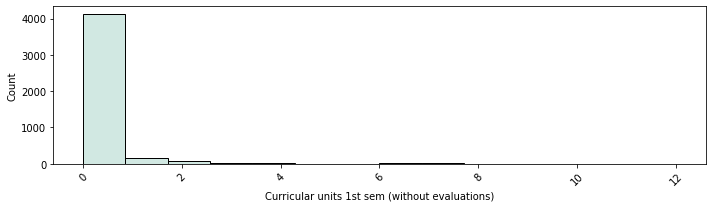

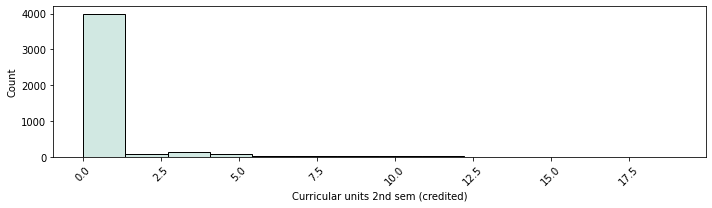

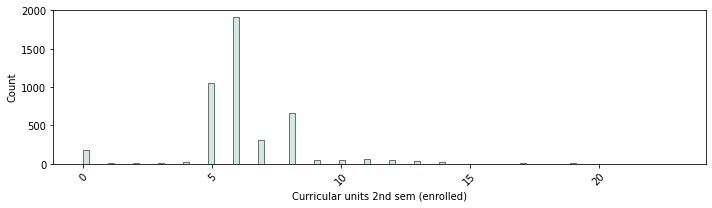

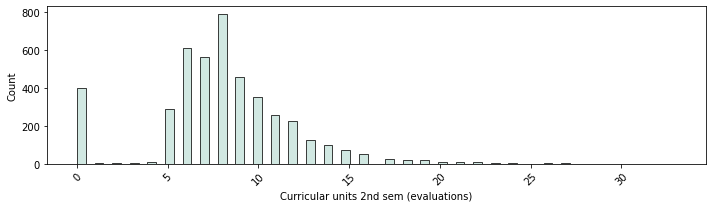

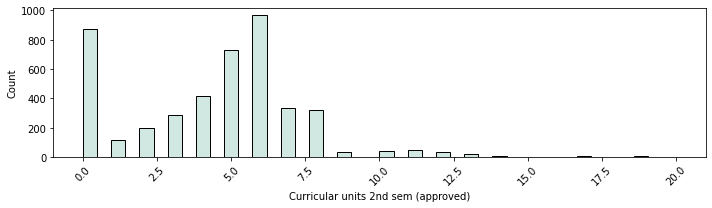

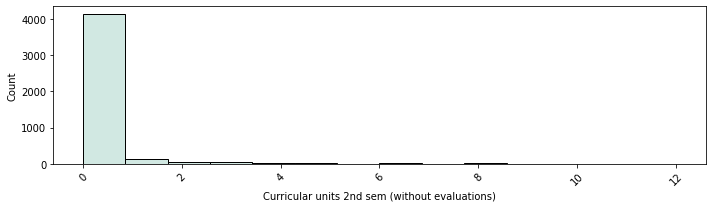

In [12]:
for col in cat_cols.columns:
  plot_charts(df, col)

- [ ] Add categorical visual analysis description

##Continuous Data Inspection

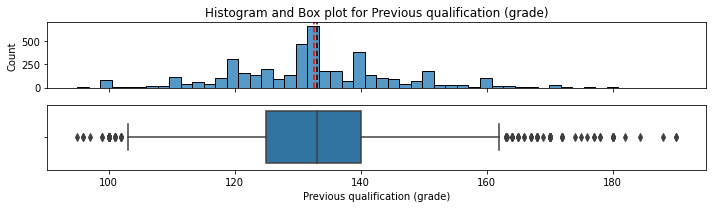

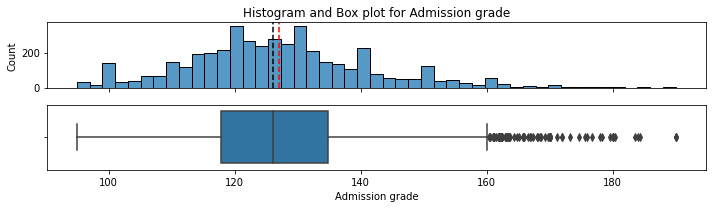

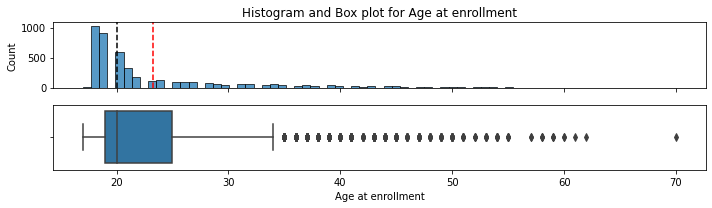

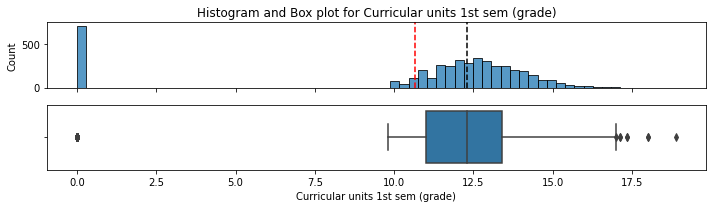

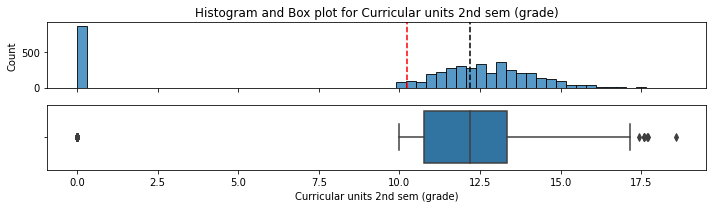

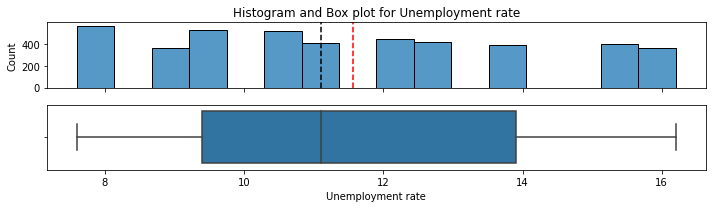

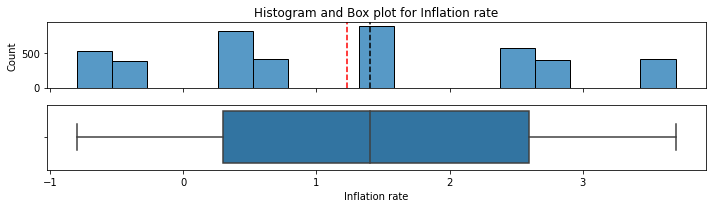

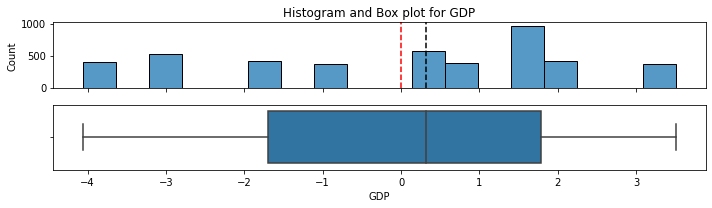

In [13]:
for ncol in num_cols.columns:
  plot_charts(df, ncol, boxplot=True)

>- [ ] Add numeric visual analysis description

##Heatmap
- [x] To see a correlation to the target variable we have to numerically encode the target. 

In [18]:
target_labels = ['Graduate', 'Dropout', 'Enrolled']
df['Target'] = df['Target'].map({'Graduate':0, 'Dropout':1, 'Enrolled':2})

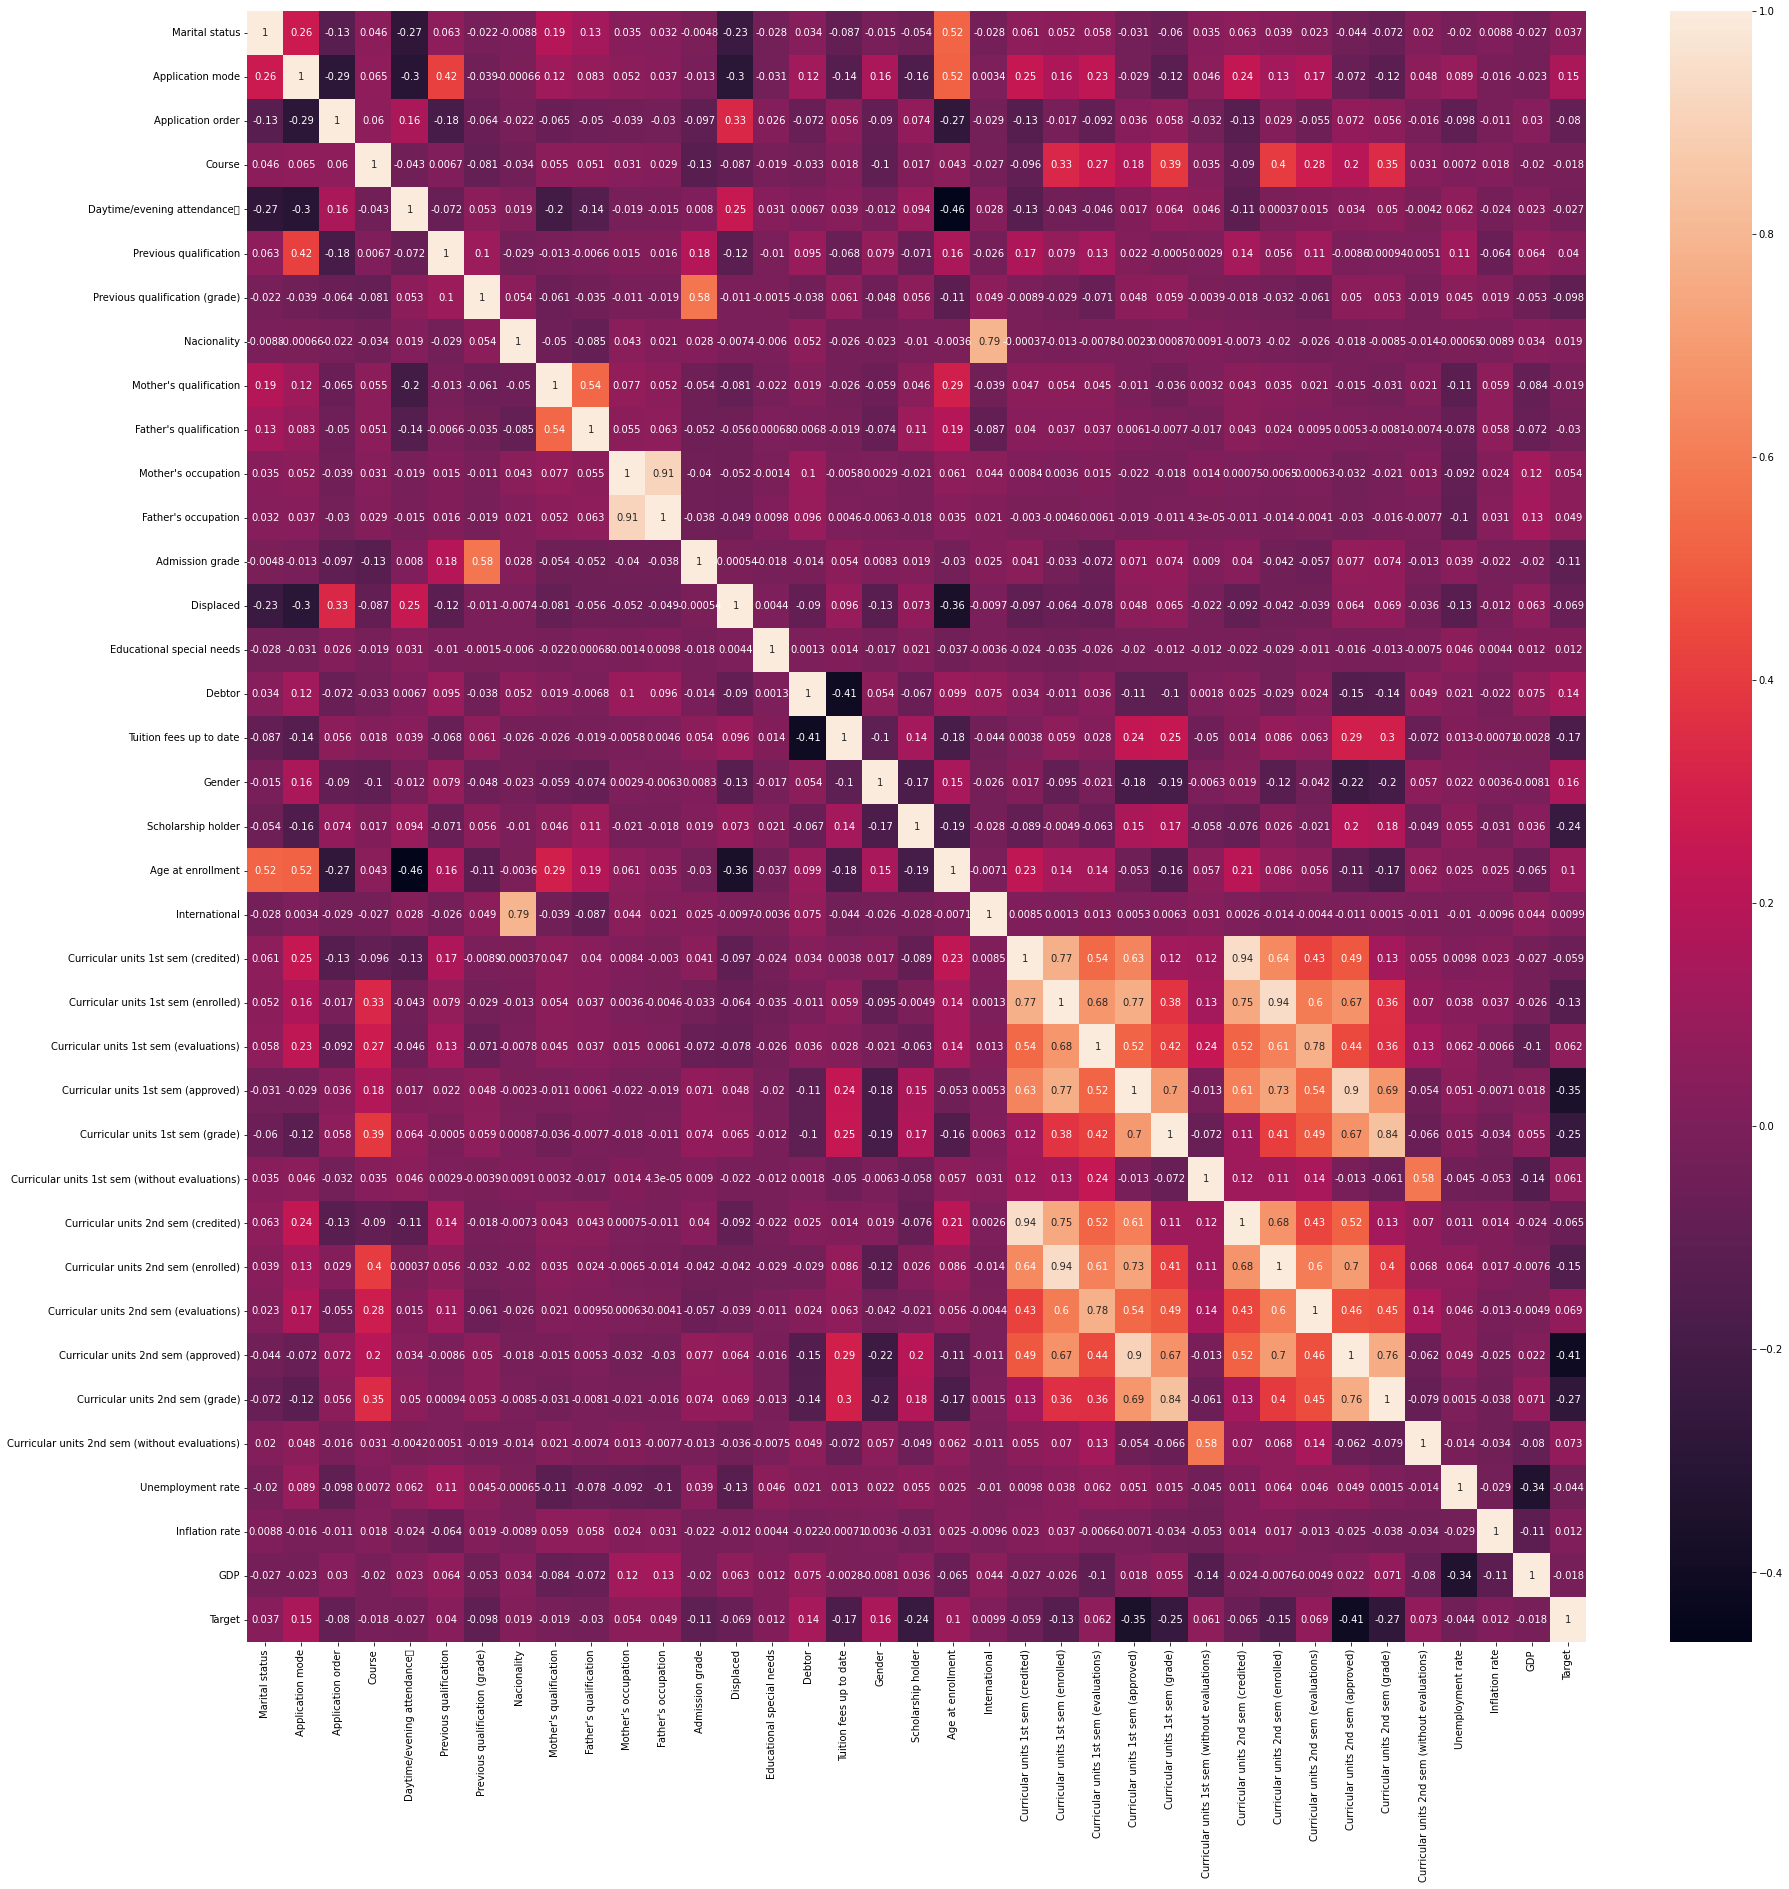

In [21]:
fig, ax = plt.subplots(figsize=(30,30));
sns.heatmap(df.corr(), annot=True, ax=ax);

>The strongest correlations to the Target variable are:
 - Application mode: 15%
 - Admission grade: -11%
 - Debtor: 14%
 - Gender: 16%
 - Scholarship holder: -24%
 - Age at Enrollment: 10%
 - Curricular Units 1st sem (approved): -35%
 - Curricular Units 1st sem (grade): -25%
 - Curricular Units 2nd sem (approved): -41%
 - Curricular Units 2nd sem (grade): -27%

 > The columns with very weak(<=3%) correlations are:
 - Course: -1.8%
 - Daytime/Evening attendance: -2.7%
 - Nacionality: 1.9%
 - Mothers qualification: -1.9%
 - Father's qualifications: -3%
 - Educational Special needs: 1.2%
 - International: 0.99%
 - Inflation rate: 0.12%
 - GDP: 0.18%
 
>My recomendation is to drop these columns for this analysis 

In [29]:
df.drop(columns=['Course', "Daytime/evening attendance\t",'Nacionality',
                 "Mother's qualification","Father's qualification",
                 "Educational special needs","International","Inflation rate","GDP"], inplace=True)

##Multivariate Visual Analysis

#Target Balance

In [14]:
df['Target'].value_counts(normalize=True)

Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64

> This is a multiclass classification problem. Target `Target = [Dropout, Graduate, Enrolled]` 

>The bulk of the data shows students graduating (49.9%) while the minority are either enrolled (17.9%) or dropped out (32%).  I will have to employ a sampling technique during modeling to handle this imbalance of data. Choice of over-/undersampling or SMOTE.

#Train Test Split

#Data Pipelines

###Data Imbalance
